<a href="https://colab.research.google.com/github/JatinB22/DataScienceProjects/blob/main/sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kazanova/sentiment140")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/sentiment140


In [2]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv


In [3]:
import re
import string
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer


In [4]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [5]:
df = pd.read_csv('/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv', encoding='latin-1', header=None)

print(df.columns)
df.head()

Index([0, 1, 2, 3, 4, 5], dtype='int64')


,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [6]:
df.columns = ['target', 'ids', 'date', 'flag', 'user', 'text']
df

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [7]:
df = df[['target', 'text']]
df.head()

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [8]:
def clean_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return " ".join(tokens)

In [9]:
df['cleaned_text'] = df['text'].apply(clean_text)

/tmp/ipython-input-3867957871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_text'] = df['text'].apply(clean_text)


In [10]:
#Train-Test Split
from sklearn.model_selection import train_test_split

In [11]:
df['sentiment'] = df['target'].apply(lambda x: 0 if x == 0 else 1)

X = df['cleaned_text']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1, 2), min_df=5, max_df=0.8)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

/tmp/ipython-input-585721289.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['target'].apply(lambda x: 0 if x == 0 else 1)


Accuracy: 0.79564375
              precision    recall  f1-score   support

           0       0.81      0.78      0.79    159494
           1       0.79      0.82      0.80    160506

    accuracy                           0.80    320000
   macro avg       0.80      0.80      0.80    320000
weighted avg       0.80      0.80      0.80    320000



In [12]:
new_reviews = [
    "I love this product, it's amazing!",
    "Worst purchase ever, completely useless.",
    "It's okay, nothing special about it."
]

new_reviews_cleaned = [clean_text(review) for review in new_reviews]
new_reviews_vec = vectorizer.transform(new_reviews_cleaned)

predictions = model.predict(new_reviews_vec)
for review, pred in zip(new_reviews, predictions):
    sentiment = "Positive" if pred == 1 else "Negative"
    print(f"Review: {review}\nPredicted Sentiment: {sentiment}\n")

Review: I love this product, it's amazing!
Predicted Sentiment: Positive

Review: Worst purchase ever, completely useless.
Predicted Sentiment: Negative

Review: It's okay, nothing special about it.
Predicted Sentiment: Positive



In [14]:
import re
import string
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Download necessary NLTK data
#nltk.download('punkt')

# Step 1: Define text cleaning and stemming functions
stop_words = set(ENGLISH_STOP_WORDS)  # Stopwords in English from sklearn

# Initialize Porter Stemmer
stemmer = PorterStemmer()

def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation and non-alphabetic characters
    text = re.sub(f"[{string.punctuation}]", " ", text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Tokenization
    tokens = nltk.word_tokenize(text)

    # Remove stop words and stem
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words and word.isalpha()]

    return " ".join(tokens)



In [15]:
# Step 2: Load and preprocess the Sentiment140 dataset (Assuming dataset is loaded into df)
# For this example, I'll create a sample DataFrame (replace with actual dataset loading code)


df = pd.read_csv('/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv', encoding='latin-1', header=None)
df.columns = ['target', 'ids', 'date', 'flag', 'user', 'text']
df = df[['target', 'text']]
df['sentiment'] = df['target'].apply(lambda x: 0 if x == 0 else 1)
# Clean the text data using the clean_text function
df['cleaned_review'] = df['text'].apply(clean_text)



In [16]:
# Step 3: Prepare Data for Training
X = df['cleaned_review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [17]:
# Step 4: TF-IDF Vectorization (with bigrams)
vectorizer = TfidfVectorizer(ngram_range=(1, 2), min_df=2, max_df=0.8)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)



In [18]:
# Step 5: Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)



LogisticRegression(max_iter=1000)

In [19]:
# Step 6: Make Predictions
y_pred = model.predict(X_test_vec)



In [20]:
# Step 7: Evaluate Model Performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Accuracy: 0.78854375
              precision    recall  f1-score   support

           0       0.80      0.77      0.78    159494
           1       0.78      0.81      0.79    160506

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000



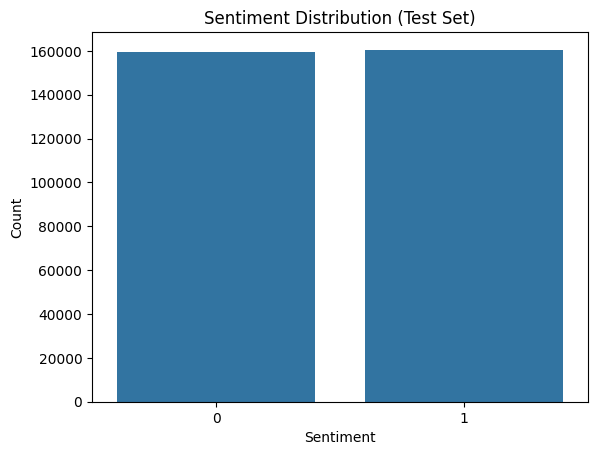

In [21]:
# Step 8: Visualize Sentiment Distribution in the Test Set
sns.countplot(x=y_test)
plt.title("Sentiment Distribution (Test Set)")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()



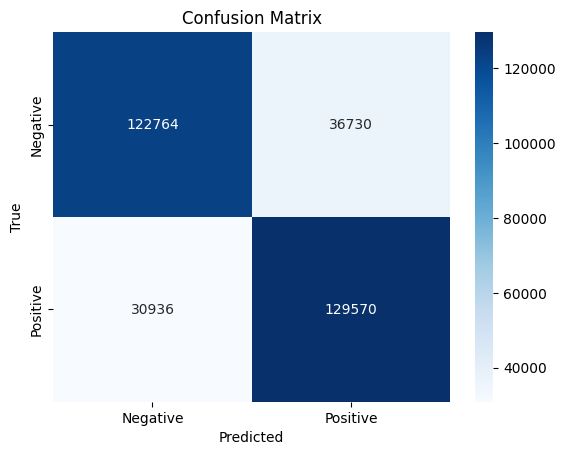

In [22]:
# Step 9: Visualize Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



In [23]:
# Step 10: Predict Sentiment on New Reviews
new_reviews = [
    "This is a great product! Very happy with my purchase.",
    "Terrible, broke on the first day.",
    "It's okay, nothing extraordinary."
]

new_reviews_cleaned = [clean_text(review) for review in new_reviews]
new_reviews_vec = vectorizer.transform(new_reviews_cleaned)

predictions = model.predict(new_reviews_vec)
for review, pred in zip(new_reviews, predictions):
    sentiment = "Positive" if pred == 1 else "Negative"
    print(f"Review: {review}\nPredicted Sentiment: {sentiment}\n")

Review: This is a great product! Very happy with my purchase.
Predicted Sentiment: Positive

Review: Terrible, broke on the first day.
Predicted Sentiment: Negative

Review: It's okay, nothing extraordinary.
Predicted Sentiment: Positive

